# MOVIES DATASET ANALYSIS

### This dataset contains informations of movies from 1980 to 2020. The dataset contains 7,668 movie entries and 15 columns. The analysis done on the dataset answers the questions below:

1. WHICH MOVIES HAVE THE HIGHEST BUDGET EVER?
2. WHICH MOVIES GENERATED THE HIGHEST GROSS PROFIT EVER?
3. IS THERE A CORRELATION BETWEEN THE BUDGET AND GROSS PROFIT MOVIES?
4. WHICH MOVIES HAVE THE LONGEST RUNTIME (OR DURATION)
5. WHICH MOVIES HAVE HAD THE HIGHEST VIEWER'S SCORE ?
6. HOW MANY GENRES OF MOVIES ARE THERE IN THE DATASET
7. ACCORDING TO THE DATASET, HOW MANY OF EACH GENRE OF MOVIE WAS PRODUCED OVER THE LAST 40 YEARS?
8. TOP 5 MOST PRODUCED GENRE OF MOVIES
9. WHICH OF THE TOP 5 MOST PRODUCED GENRE OF MOVIES GENERATED THE HIGHEST GROSS PROFIT?
10. WHICH OF THE TOP 5 MOST PRODUCED GENRE OF MOVIE HAS THE LONGEST RUNTIME?
11. WHAT ARE THE MOVIE RATING SYSTEMS AND HOW MANY HAVE BEEN PRODUCED?
12. TOP 5 MOVIES RATING EVER PRODUCED
13. WHICH OF THE TOP 5 MOVIE RATING HAS THE HIGHEST RUNTIME?
14. WHICH OF THE TOP 5 MOVIE RATINGS HAVE HAD THE HIGHEST BUDGET WITHIN THE 40-YEAR PERIOD?
15. THE TOP 5 MOVIE RATINGS THAT HAS GENERATED THE HIGHEST GROSS PROFIT?
16. WHICH COMPANIES HAVE PRODUCED THE MOST MOVIES?
17. WHICH OF THE TOP 10 COMPANES HAVE SPENT THE MOST BUDGET ON MOVIES?
18. WHICH COMPANIES HAVE GENERATED THE MOST GROSS PROFIT?
19. WHO HAS DIRECTED THE MOST MOVIES OVER THE 40-YEARS PERIOD?
20. TOP 15 ACTORS THAT HAVE BEEN THE STAR OF A MOVIE THE MOST IN OVER 40 YEARS.

### IMPORTING THE NECESSARY LIBRARIES

In [284]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

### LOADING THE DATASET

In [575]:
movies = pd.read_csv("movies.csv")

### CHECKING THE DATASET

In [581]:
movies.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


### CHECKING INFO OF THE DATASET

In [582]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


### This dataset contains 7668 entries of movies from 1980 to 2020 (a 40-year period). It has 14 columns describing different aspects of each movie as can be seeing below.

In [158]:
movies.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'Budget (in million)',
       'Gross (in million)', 'company', 'runtime'],
      dtype='object')

### CHECKING THE DATA FOR MISSING VALUES

In [13]:
md = movies.isnull().sum()
md

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

### VISUALIZING THE NUMBER OF MISSING DATA IN EACH COLUMN

Text(0.5, 1.0, 'HORIZONTAL BARCHAT SHOWING NUMBER OF MISSING VALUES IN EACH COLUMN')

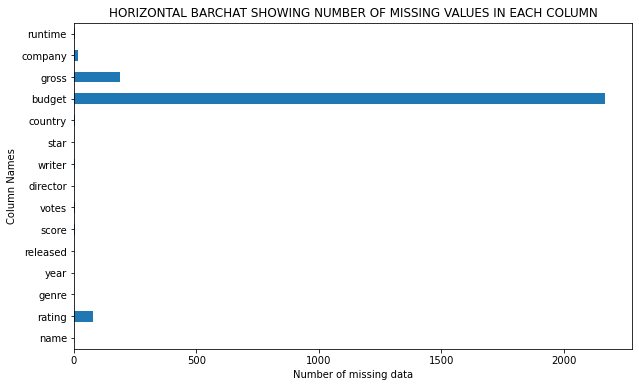

In [148]:
plt.figure(figsize = (10,6))
md.plot(kind = "barh", )
plt.xlabel("Number of missing data")
plt.ylabel("Column Names")
plt.title("HORIZONTAL BARCHAT SHOWING NUMBER OF MISSING VALUES IN EACH COLUMN")

### FILLING IN ROWS WITH MISSING DATA

In [24]:
movies.fillna({"rating" : "NONE",
              "released": "No Date",
              "score" : 0,
              "votes" : 0,
              "writer": "No Name",
              "star" : "No Name",
              "country" : "unknown",
              "budget" : 0,
              "gross" : 0,
              "company" : "not known",
              "runtime": 0}, inplace = True)

### CONVERTING THE BUDGET AND GROSS COLUMN TO MILLIONS

In [48]:
movies["gross"] = movies["gross"]/1000000

In [47]:
movies["budget"] = movies["budget"]/1000000

### RENAMING THE BUDGET AND GROSS COLUMNS

In [55]:
movies.rename({"gross" : "Gross (in million)",
              "budget" : "Budget (in million)"}, axis = 1, inplace = True)

## CONVERTING BUDGET AND GROSS COLUMNS TO INTEGER

In [572]:
movies["Gross (in million)"] = movies["Gross (in million)"].astype("int32")

In [573]:
movies["Budget (in million)"] = movies["Budget (in million)"].astype("int32")

## 1. WHICH MOVIES HAVE THE HIGHEST BUDGET EVER?

In [77]:
hb = movies.sort_values("Budget (in million)", ascending = False).head(10)[["name", "rating",
                                                                            "genre", "year", 
                                                                            "Budget (in million)", "company"]]
hb.reset_index(inplace = True)

In [78]:
del hb["index"]

In [79]:
hb

,name,rating,genre,year,Budget (in million),company
0,Avengers: Endgame,PG-13,Action,2019,356.0,Marvel Studios
1,Avengers: Infinity War,PG-13,Action,2018,321.0,Marvel Studios
2,Star Wars: Episode VIII - The Last Jedi,PG-13,Action,2017,317.0,Walt Disney Pictures
3,Pirates of the Caribbean: at World's End,PG-13,Action,2007,300.0,Walt Disney Pictures
4,Justice League,PG-13,Action,2017,300.0,Warner Bros.
5,Solo: A Star Wars Story,PG-13,Action,2018,275.0,Lucasfilm
6,Star Wars: Episode IX - The Rise of Skywalker,PG-13,Action,2019,275.0,Walt Disney Pictures
7,Superman Returns,PG-13,Action,2006,270.0,Warner Bros.
8,Tangled,PG,Animation,2010,260.0,Walt Disney Animation Studios
9,The Lion King,PG,Animation,2019,260.0,Walt Disney Pictures


### The highest amount ever budgeted for a movie (up until 2020) is 356 million (USD) for the movie AVENGERS: ENDGAME produced by MARVEL STUDIOS and released in the year 2019. 
### The second highest amount ever budgeted for a movie (up until 2020) was 321 million (USD) for AVENGERS: INFINITY WAR which is also a part of the AVENGERS franchise.
### 

### VISUALIZING MOVIES WITH THE HIGHEST BUDGET EVER

Text(0.5, 1.0, 'MOVIES WITH THE THE HIGHEST BUDGET')

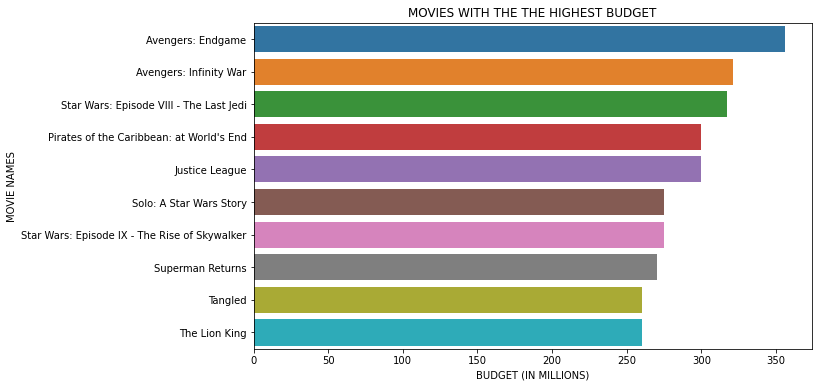

In [146]:
plt.figure(figsize = (10, 6))
sns.barplot(x = hb["Budget (in million)"], y = hb["name"])
plt.xlabel("BUDGET (IN MILLIONS)")
plt.ylabel("MOVIE NAMES")
plt.title("MOVIES WITH THE THE HIGHEST BUDGET")

## 2. WHICH MOVIES GENERATED THE HIGHEST GROSS PROFIT EVER?

In [81]:
hgp = movies.sort_values("Gross (in million)", ascending = False).head(10)[["name", "rating",
                                                                            "genre", "year", "company",
                                                                      "Budget (in million)", "Gross (in million)"]]
hgp.reset_index(inplace = True)

In [82]:
del hgp["index"]

In [104]:
# converting gross profit to be in billion (instead of million)
#hgp["Gross (in million)"] = hgp["Gross (in million)"]/ 1000

In [105]:
# Renaming Gross (in million) to Gross (in billion)
# hgp.rename({"Gross (in million)":"Gross (in billion)"}, axis = 1, inplace = True)

In [106]:
hgp

,name,rating,genre,year,company,Budget (in million),Gross (in billion)
0,Avatar,PG-13,Action,2009,Twentieth Century Fox,237.0,2.847246
1,Avengers: Endgame,PG-13,Action,2019,Marvel Studios,356.0,2.797501
2,Titanic,PG-13,Drama,1997,Twentieth Century Fox,200.0,2.201647
3,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,Lucasfilm,245.0,2.069522
4,Avengers: Infinity War,PG-13,Action,2018,Marvel Studios,321.0,2.048360
5,The Lion King,PG,Animation,2019,Walt Disney Pictures,260.0,1.670728
6,Jurassic World,PG-13,Action,2015,Universal Pictures,150.0,1.670516
7,The Avengers,PG-13,Action,2012,Marvel Studios,220.0,1.518816
8,Furious 7,PG-13,Action,2015,Universal Pictures,190.0,1.515341
9,Frozen II,PG,Animation,2019,Walt Disney Animation Studios,150.0,1.450027


### *The movie AVATAR produced in 2009 by TWENTIETH CENTURY FOX has generated the highest gross profit ever. It had a budget of just 237 million (USD) and generated a gross profit of 2.8 billion (USD).*
### *It is closely followed by "Avengers: Endgame" that generated a gross profit of 2.7 billion (USD) with a budget of 356 million (USD) (highest budget for a movie ever as analyzed above)*
### 

### VISUALIZING MOVIES WITH THE HIGHEST GROSS PROFIT EVER GENERATED.

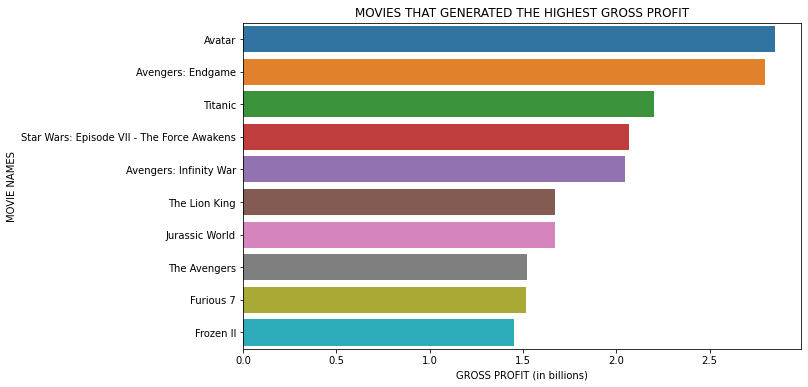

In [143]:
plt.figure(figsize = (10, 6))
sns.barplot(x = hgp["Gross (in billion)"], y = hgp["name"])
plt.xlabel("GROSS PROFIT (in billions)")
plt.ylabel("MOVIE NAMES")
plt.title("MOVIES THAT GENERATED THE HIGHEST GROSS PROFIT")
plt.show()

### 3. IS THERE A CORRELATION BETWEEN THE BUDGET AND GROSS PROFIT MOVIES?

In [558]:
movies.corr()

,year,score,votes,Budget (in million),Gross (in million),runtime
year,1.000000,0.092616,0.222427,0.309212,0.261900,0.116358
score,0.092616,1.000000,0.407101,0.056863,0.186012,0.394564
votes,0.222427,0.407101,1.000000,0.486931,0.632870,0.306984
Budget (in million),0.309212,0.056863,0.486931,1.000000,0.750157,0.268372
Gross (in million),0.261900,0.186012,0.632870,0.750157,1.000000,0.244339
runtime,0.116358,0.394564,0.306984,0.268372,0.244339,1.000000


### From the table above, the correlation coefficient between Budget and Gross profit is 0.750157. This indicates that there is a perfect or very strong correlation between the two variables. AS THE BUDGET OF A MOVIE INCREASES, THE GROSS PROFIT INCREASES AS WELL.
### The HEATMAP below also shows that.

<AxesSubplot:>

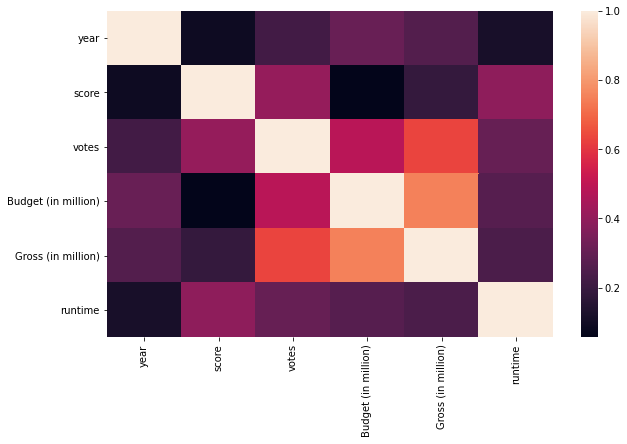

In [561]:
plt.figure(figsize = (10,6))
sns.heatmap(movies.corr())

## 4. WHICH MOVIES HAVE THE LONGEST RUNTIME (OR DURATION)

In [174]:
lrt = movies.sort_values("runtime", ascending = False).head(10)[["name", "rating","genre", "year",
                                                                 "runtime"]].reset_index()

In [175]:
del lrt["index"]

In [176]:
# converting the runtime to hours
lrt["runtime"] = lrt["runtime"]/60

In [177]:
lrt

,name,rating,genre,year,runtime
0,The Best of Youth,R,Drama,2003,6.100000
1,Little Dorrit,G,Drama,1987,5.950000
2,Gettysburg,PG,Drama,1993,4.516667
3,Hamlet,PG-13,Drama,1996,4.033333
4,The Beautiful Troublemaker,Unrated,Drama,1991,3.966667
5,Once Upon a Time in America,R,Crime,1984,3.816667
6,Lagaan: Once Upon a Time in India,PG,Drama,2001,3.733333
7,Gods and Generals,PG-13,Biography,2003,3.650000
8,Heaven's Gate,R,Adventure,1980,3.650000
9,Kabhi Khushi Kabhie Gham...,Not Rated,Drama,2001,3.500000


### *The movie with the longest runtime is a 2003 "R" rated DRAMA by BiBi FILM called "THE BEST YOUTH". It has a runtime (or duration) of 6hours and 1 minute.*
### *It is closely followed by another DRAMA "LITTLE DORRIT" produced by SANDS that has a runtime of 5hour and 9minutes.*
#### 

### VISUALIZING MOVIES WITH THE LONGEST RUNTIME (OR DURATION)

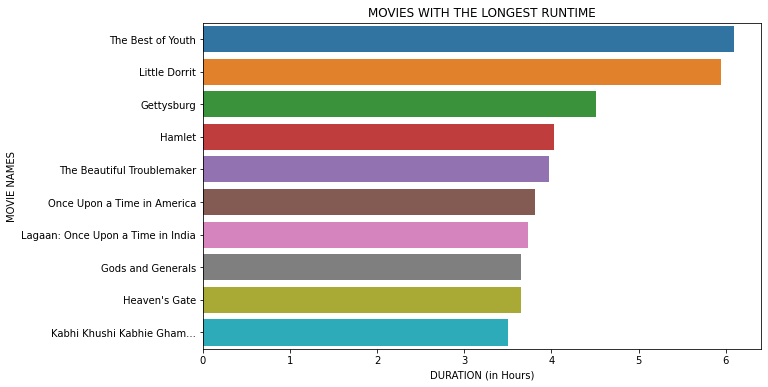

In [247]:
plt.figure(figsize = (10, 6))
sns.barplot(x = lrt["runtime"], y = lrt["name"])
plt.xlabel("DURATION (in Hours)")
plt.ylabel("MOVIE NAMES")
plt.title("MOVIES WITH THE LONGEST RUNTIME")
plt.show()

## 5. WHICH MOVIES HAVE HAD THE HIGHEST VIEWER'S SCORE ?

In [261]:
hvs = movies.sort_values("score", ascending = False)[["name", "rating","genre", "year",
                                                                 "score"]].head(10).reset_index()

In [262]:
del hvs["index"]

In [263]:
hvs

,name,rating,genre,year,score
0,The Shawshank Redemption,R,Drama,1994,9.3
1,The Dark Knight,PG-13,Action,2008,9.0
2,The Lord of the Rings: The Return of the King,PG-13,Action,2003,8.9
3,Schindler's List,R,Biography,1993,8.9
4,Pulp Fiction,R,Crime,1994,8.9
5,Inception,PG-13,Action,2010,8.8
6,The Lord of the Rings: The Fellowship of the Ring,PG-13,Action,2001,8.8
7,Forrest Gump,PG-13,Drama,1994,8.8
8,Fight Club,R,Drama,1999,8.8
9,The Matrix,R,Action,1999,8.7


### VISUALIZING MOVIES WITH HIGHEST VIEWER SCORE

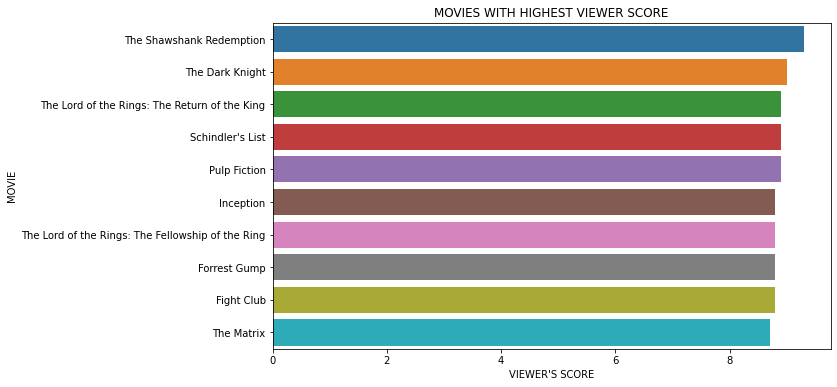

In [270]:
plt.figure(figsize = (10, 6))
sns.barplot(x = hvs["score"], y = hvs["name"])
plt.title("MOVIES WITH HIGHEST VIEWER SCORE")
plt.xlabel("VIEWER'S SCORE")
plt.ylabel("MOVIE")
plt.show()

## 6. HOW MANY GENRES OF MOVIES ARE THERE IN THE DATASET

In [220]:
movies["genre"].nunique()

19

### *There are 19 unique genres in the dataset*
## 

## 7. ACCORDING TO THE DATASET, HOW MANY OF EACH GENRE OF MOVIE WAS PRODUCED OVER THE LAST 40 YEARS?

In [324]:
movies["genre"].value_counts()

Comedy       2245
Action       1705
Drama        1518
Crime         551
Biography     443
Adventure     427
Animation     338
Horror        322
Fantasy        44
Mystery        20
Thriller       16
Family         11
Sci-Fi         10
Romance        10
Western         3
Musical         2
History         1
Music           1
Sport           1
Name: genre, dtype: int64

### *According to the dataset, the genre that has been produced the most is COMEDY* 
#### 

## 8. TOP 5 MOST PRODUCED GENRE OF MOVIES

In [340]:
mpg5 = pd.DataFrame(mpg5["genre"].value_counts().head()).reset_index()

In [341]:
mpg5 = mpg5.rename({"index":"Genre", "genre":"Count"}, axis = 1)

In [342]:
mpg5

,Genre,Count
0,Comedy,2245
1,Action,1705
2,Drama,1518
3,Crime,551
4,Biography,443


### *The top 5 most produced movies are COMEDY, ACTION, DRAMA, CRIME and BIOGRAPHY.*
#### 

In [343]:
### Getting a DataFrame of the TOP 5 Most Produced Genre
top5mpg = movies[movies["genre"].isin(mpg10["Genre"])]

### VISUALIZING THE TOP 5 MOST PRODUCED GENRE OF MOVIES

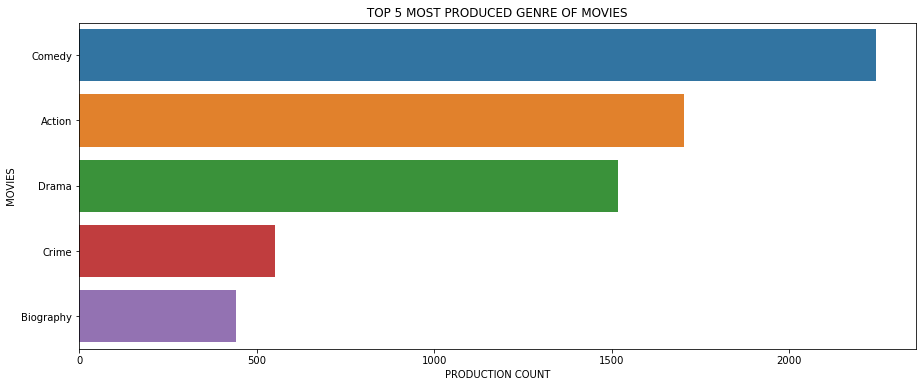

In [362]:
plt.figure(figsize = (15, 6))
sns.barplot(x = mpg10["Count"], y = mpg10["Genre"])
plt.xlabel("PRODUCTION COUNT")
plt.ylabel(" MOVIES ")
plt.title(" TOP 5 MOST PRODUCED GENRE OF MOVIES ")
plt.show()

## 9. WHICH OF THE TOP 5 MOST PRODUCED GENRE OF MOVIES GENERATED THE HIGHEST GROSS PROFIT?

In [360]:
top5mpg_gp = top5mpg.groupby("genre").agg(["sum", "mean"])["Gross (in million)"].reset_index()
top5mpg_gp

,genre,sum,mean
0,Action,243435.855754,142.777628
1,Biography,20729.581801,46.793638
2,Comedy,97175.468462,43.285287
3,Crime,21355.448322,38.757619
4,Drama,57150.648537,37.648649


### *Amongst the top 5 most produced genre of movies, the genre that generated the HIGHEST GROSS PROFIT is ACTION MOVIES with a gross of 243 BILLION DOLLARS*
### 

### VISUALIZING THE TOP 5 MOST PRODUCED GENRE OF MOVIES THAT GENERATED THE HIGHEST GROSS PROFIT?

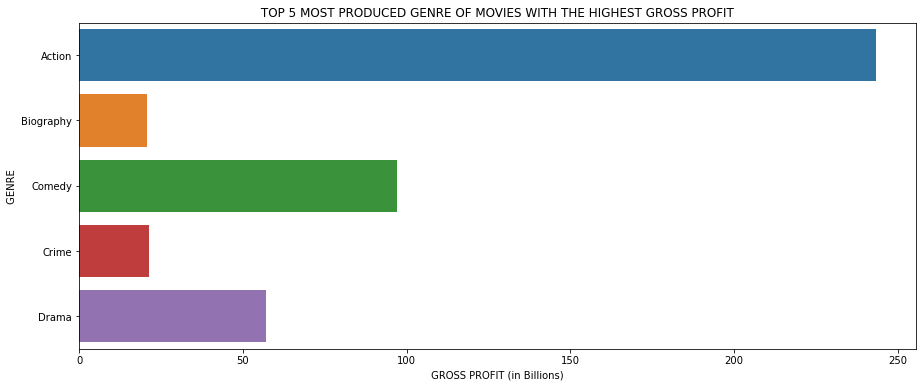

In [363]:
plt.figure(figsize = (15, 6))
sns.barplot(x = top5mpg_gp["sum"]/1000, y = top5mpg_gp["genre"])
plt.xlabel(" GROSS PROFIT (in Billions) ")
plt.ylabel(" GENRE ")
plt.title(" TOP 5 MOST PRODUCED GENRE OF MOVIES WITH THE HIGHEST GROSS PROFIT ")
plt.show()

## 10. WHICH OF THE TOP 5 MOST PRODUCED GENRE OF MOVIE HAS THE LONGEST RUNTIME?

In [351]:
lrt_g = top5mpg.groupby("genre").agg(["sum", "mean"])["runtime"].reset_index()
lrt_g

,genre,sum,mean
0,Action,187800.0,110.146628
1,Biography,53107.0,119.880361
2,Comedy,227849.0,101.491759
3,Crime,61464.0,111.549909
4,Drama,171270.0,112.826087


In [352]:
# Converting the sum and mean of the time from minutes to hours
lrt_g["sum"] = lrt_g["sum"]/60
lrt_g["mean"] = lrt_g["mean"]/60

In [353]:
lrt_g

,genre,sum,mean
0,Action,3130.000000,1.835777
1,Biography,885.116667,1.998006
2,Comedy,3797.483333,1.691529
3,Crime,1024.400000,1.859165
4,Drama,2854.500000,1.880435


### *According to the dataset, the genre amongst the TOP 5 MOST PRODUCED GENRE with the longest AVERAGE RUNTIME is ACTION with an average runtime of approximately 2 HOURS.*
### *While the genre with the most TOTAL runtime over the 40-year period is COMEDY with a total runtime of 3,797 hours and an average runtime of 1hour 6minutes.*
#### 

### VISUALIZING THE TOP 5 MOST PRODUCED GENRE WITH THE LONGEST RUNTIME

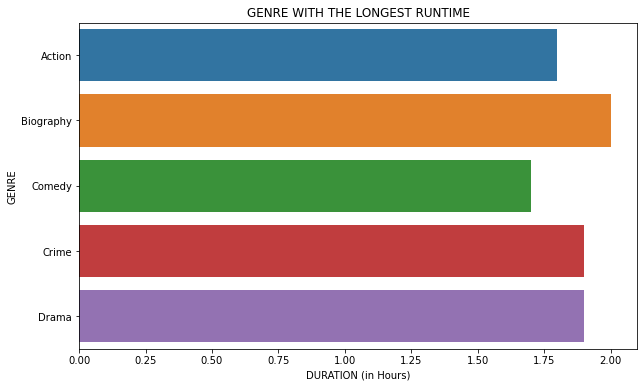

In [354]:
plt.figure(figsize = (10, 6))
sns.barplot(x = round(lrt_g["mean"], 1), y = lrt_g["genre"])
plt.title("GENRE WITH THE LONGEST RUNTIME")
plt.xlabel("DURATION (in Hours)")
plt.ylabel("GENRE")
plt.show()

## 11. WHAT ARE THE MOVIE RATING SYSTEMS AND HOW MANY HAVE BEEN PRODUCED?

In [373]:
movies.rating.value_counts()

R            3697
PG-13        2112
PG           1252
Not Rated     283
G             153
NONE           77
Unrated        52
NC-17          23
TV-MA           9
TV-PG           5
X               3
Approved        1
TV-14           1
Name: rating, dtype: int64

## 12. TOP 5 MOVIES RATING EVER PRODUCED

In [382]:
mr5 = pd.DataFrame(movies.rating.value_counts().head()).reset_index()

In [383]:
mr5 = mr5.rename({"index": "rating", "rating": "count"}, axis = 1)

In [384]:
mr5

,rating,count
0,R,3697
1,PG-13,2112
2,PG,1252
3,Not Rated,283
4,G,153


### *The movie rating that has been produced the most in over 40 years are R Rated movies.*
### *R rated movies are movies produced that are restricted to viewers under the age of 17.*
#### 

### VISUALIZING THE PERCENTAGE OF TOP 5 MOVIES RATING EVER PRODUCED

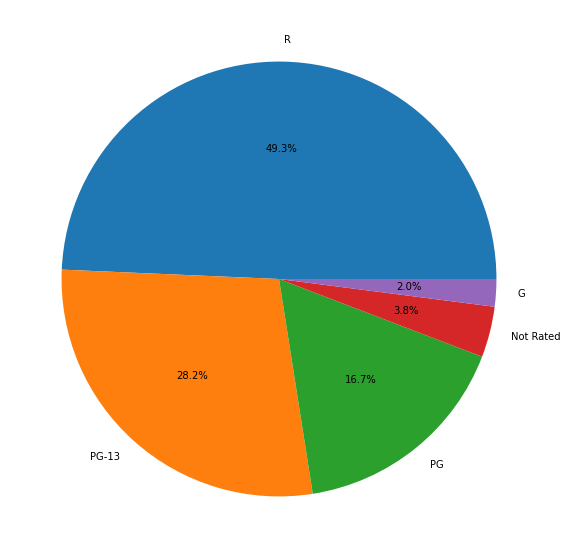

In [449]:
plt.figure(figsize = (20, 10))
plt.pie(movies.rating.value_counts().head(), 
        labels = ["R", "PG-13", "PG", "Not Rated", "G"],
       autopct = "%1.1f%%")
plt.show()

#### *Amongst the top 5 movie ratings produced, %49.3 percent are R rated movies*

#### CREATING A DATAFRAME FOR THE TOP 5 MOVIE RATING SYSTEMS

In [393]:
top5mr = movies[movies["rating"].isin(mr5["rating"])]

In [391]:
top5mr

,name,rating,genre,year,released,score,votes,director,writer,star,country,Budget (in million),Gross (in million),company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19.000,46.998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4.500,58.853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18.000,538.375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3.500,83.453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6.000,39.846344,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7653,The Quarry,R,Crime,2020,"April 17, 2020 (Mexico)",5.4,2400.0,Scott Teems,Scott Teems,Shea Whigham,United States,0.000,0.003661,Prowess Pictures,98.0
7656,Tulsa,PG-13,Comedy,2020,"June 3, 2020 (United States)",5.0,294.0,Scott Pryor,Scott Pryor,Scott Pryor,United States,0.000,0.413378,Pryor Entertainment,120.0
7658,Black Wall Street Burning,R,Drama,2020,"February 7, 2020 (United States)",6.6,35.0,Marcus Brown,Dekoven Riggins,Dan Belcher,United States,0.005,0.000000,Notis Studio,78.0
7659,I Am Fear,Not Rated,Horror,2020,"March 3, 2020 (United States)",3.4,447.0,Kevin Shulman,Kevin Shulman,Kristina Klebe,United States,0.000,0.013266,Roxwell Films,87.0


## 13. WHICH OF THE TOP 5 MOVIE RATING HAS THE HIGHEST RUNTIME?

In [394]:
top5mr_hrt = top5mr.groupby("rating").agg(["sum", "mean"])["runtime"].reset_index()
top5mr_hrt

,rating,sum,mean
0,G,13922.0,90.993464
1,Not Rated,33129.0,117.063604
2,PG,129001.0,103.035942
3,PG-13,230104.0,108.950758
4,R,397727.0,107.581012


### VISUALIZING THE TOP 5 MOVIE RATINGS WITH THE HIGHEST RUNTIME

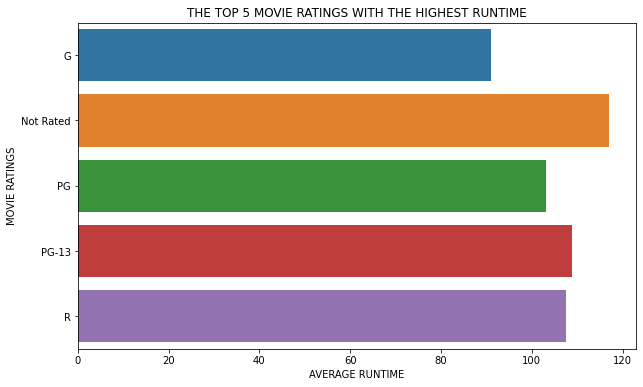

In [433]:
plt.figure(figsize = (10, 6))
sns.barplot(x = top5mr_hrt["mean"], y = top5mr_hrt["rating"])

plt.title("THE TOP 5 MOVIE RATINGS WITH THE HIGHEST RUNTIME")
plt.rc('font', size=10)
plt.xlabel("AVERAGE RUNTIME")
plt.ylabel("MOVIE RATINGS")
plt.show()

## 14. WHICH OF THE TOP 5 MOVIE RATINGS HAVE HAD THE HIGHEST BUDGET WITHIN THE 40-YEAR PERIOD?

In [454]:
mr_budg = top5mr.groupby("rating").agg(["sum", "mean"])["Budget (in million)"].reset_index()
mr_budg

,rating,sum,mean
0,G,5916.570000,38.670392
1,Not Rated,381.204228,1.347011
2,PG,40135.723769,32.057287
3,PG-13,88293.082768,41.805437
4,R,60540.870585,16.375675


### VISUALIZING THE TOP 5 MOVIE RATINGS THAT HAVE THE HIGHEST BUDGET TO PRODUCE

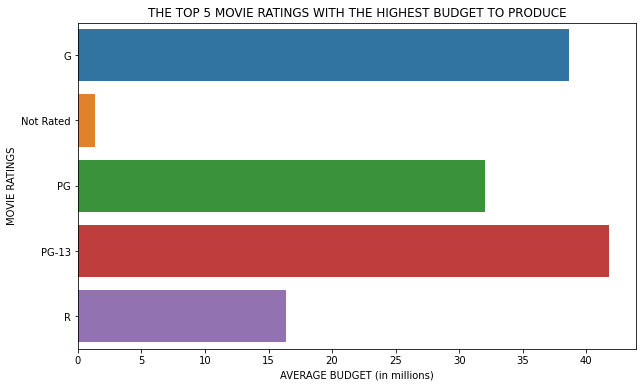

In [457]:
plt.figure(figsize = (10, 6))
sns.barplot(x = mr_budg["mean"], y = mr_budg["rating"])

plt.title("THE TOP 5 MOVIE RATINGS WITH THE HIGHEST BUDGET TO PRODUCE")
plt.rc('font', size=10)
plt.xlabel("AVERAGE BUDGET (in millions)")
plt.ylabel("MOVIE RATINGS")
plt.show()

## 15. THE TOP 5 MOVIE RATINGS  THAT HAS GENERATED THE HIGHEST GROSS PROFIT?

In [459]:
mr_gross = top5mr.groupby("rating").agg(["sum", "mean"])["Gross (in million)"].reset_index()
mr_gross

,rating,sum,mean
0,G,21590.586882,141.114947
1,Not Rated,4609.138432,16.286708
2,PG,130071.562164,103.891024
3,PG-13,273664.111178,129.575810
4,R,154162.445650,41.699336


#### *The movie rating that has generated the highest gross profit is THE G RATED Movies. With an average of 141 milion dollars profit generated  per movie.*
#### *G RATED movies are movies that can be viewed by the GENERAL PUBLIC.* 
#### 

### VISUALIZING TOP 5 MOVIE RATINGS THAT HAS GENERATED THE MOST GROSS PROFIT

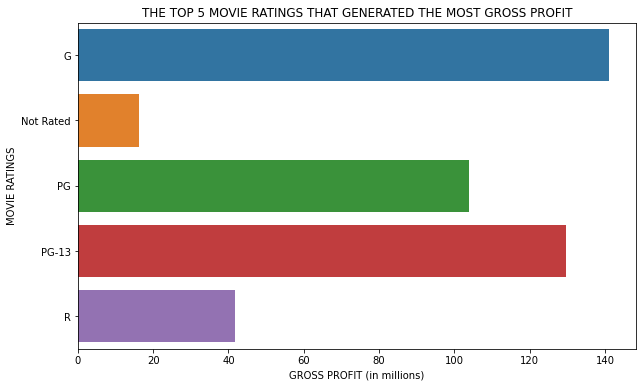

In [463]:
plt.figure(figsize = (10, 6))
sns.barplot(x = mr_gross["mean"], y = mr_gross["rating"])

plt.title("THE TOP 5 MOVIE RATINGS THAT GENERATED THE MOST GROSS PROFIT")
plt.rc('font', size=10)
plt.xlabel("GROSS PROFIT (in millions)")
plt.ylabel("MOVIE RATINGS")
plt.show()

## 16. WHICH COMPANIES HAVE PRODUCED THE MOST MOVIES?

In [476]:
mov_prod_comp = pd.DataFrame(movies.company.value_counts().head(10)).reset_index()
mov_prod_comp

,index,company
0,Universal Pictures,377
1,Warner Bros.,334
2,Columbia Pictures,332
3,Paramount Pictures,320
4,Twentieth Century Fox,240
5,New Line Cinema,174
6,Touchstone Pictures,132
7,Metro-Goldwyn-Mayer (MGM),125
8,Walt Disney Pictures,123
9,TriStar Pictures,94


In [481]:
## RENAMING THE COLUMNS

In [478]:
mov_prod_comp.rename({"index": "Company", "company":"Number of Movies Produced"}, axis = 1, inplace = True)

In [480]:
mov_prod_comp.head()

,Company,Number of Movies Produced
0,Universal Pictures,377
1,Warner Bros.,334
2,Columbia Pictures,332
3,Paramount Pictures,320
4,Twentieth Century Fox,240


#### ABOVE ARE THE TOP TEN COMPANIES IN TERMS OF HOW MANY MOVIES THEY HAVE PRODUCED FROM 1980 TO 2020
#### 

### VISUALIZING TOP TEN COMPANIES (IN THERMS OF NUMBER MOVIE PRODUCED)

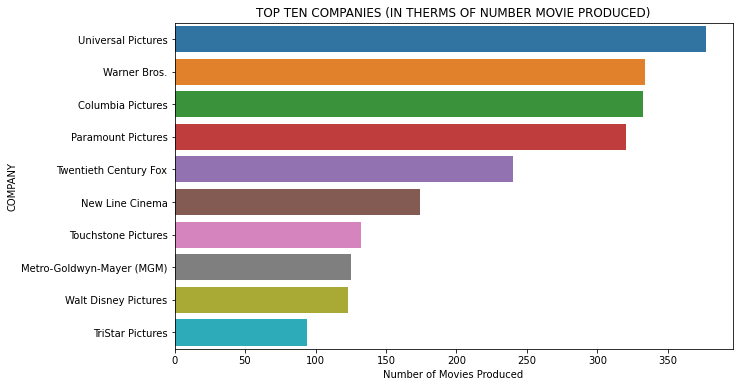

In [482]:
plt.figure(figsize = (10, 6))
sns.barplot(x = mov_prod_comp["Number of Movies Produced"], y =mov_prod_comp["Company"])

plt.title("TOP TEN COMPANIES (IN THERMS OF NUMBER MOVIE PRODUCED)")
plt.rc('font', size=10)
plt.xlabel("Number of Movies Produced")
plt.ylabel("COMPANY")
plt.show()

### Creating a DataFrame to show all columns in the movies Dataset for ONLY the top 10 companies

In [485]:
top10comp = movies[movies["company"].isin(mov_prod_comp["Company"])]
top10comp.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,Budget (in million),Gross (in million),company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19.00,46.998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4.50,58.853106,Columbia Pictures,104.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3.50,83.453539,Paramount Pictures,88.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,0.55,39.754601,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27.00,115.229890,Universal Pictures,133.0


## 17. WHICH OF THE TOP 10 COMPANES HAVE SPENT THE MOST BUDGET ON MOVIES?

In [493]:
top10comp_budg = top10comp.groupby("company").agg(["mean", "sum"])["Budget (in million)"].reset_index()
top10comp_budg

,company,mean,sum
0,Columbia Pictures,46.723214,15512.107000
1,Metro-Goldwyn-Mayer (MGM),28.386000,3548.250000
2,New Line Cinema,32.460920,5648.200000
3,Paramount Pictures,42.885781,13723.450000
4,Touchstone Pictures,31.467424,4153.700000
5,TriStar Pictures,22.233670,2089.965000
6,Twentieth Century Fox,47.810833,11474.600000
7,Universal Pictures,42.413077,15989.730001
8,Walt Disney Pictures,84.591057,10404.700000
9,Warner Bros.,58.587725,19568.300000


### VISUALIZING THE TOP 10 COMPANIES HAVE SPENT THE MOST BUDGET ON MOVIES

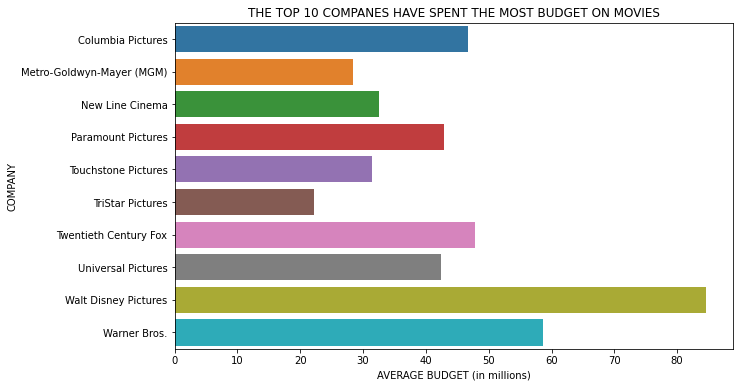

In [494]:
plt.figure(figsize = (10, 6))
sns.barplot(x = top10comp_budg["mean"], y = top10comp_budg["company"])

plt.title("THE TOP 10 COMPANES HAVE SPENT THE MOST BUDGET ON MOVIES")
plt.rc('font', size=10)
plt.xlabel("AVERAGE BUDGET (in millions)")
plt.ylabel("COMPANY")
plt.show()

## 18. WHICH COMPANIES HAVE GENERATED THE MOST GROSS PROFIT?

In [496]:
top10comp_gross = top10comp.groupby("company").agg(["mean", "sum"])["Gross (in million)"].reset_index()
top10comp_gross

,company,mean,sum
0,Columbia Pictures,129.545004,43008.941346
1,Metro-Goldwyn-Mayer (MGM),73.841841,9230.230105
2,New Line Cinema,114.274699,19883.797684
3,Paramount Pictures,126.542523,40493.607415
4,Touchstone Pictures,89.362368,11795.832638
5,TriStar Pictures,60.291877,5667.436463
6,Twentieth Century Fox,167.737724,40257.053857
7,Universal Pictures,139.294931,52514.188890
8,Walt Disney Pictures,295.348681,36327.887792
9,Warner Bros.,169.135993,56491.421806


#### The movie production company that has generated the highest gross profit is the WALT DISNEY PICTURES. 
#### It has generated an average gross profit of 295 Billion Dollars per movies and a total of over 36 Billion Dollars in over 40 years. WAOOW !

### VISUALIZING THE TOP 10 COMPANIES THAT HAVE GENERATED THE HIGHEST GROSS PROFIT

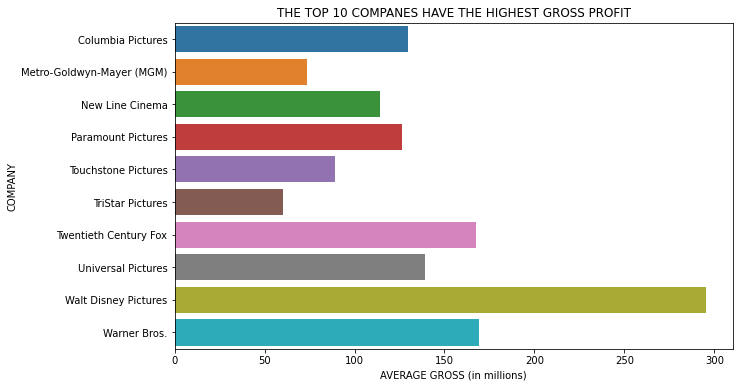

In [497]:
plt.figure(figsize = (10, 6))
sns.barplot(x = top10comp_gross["mean"], y = top10comp_gross["company"])

plt.title("THE TOP 10 COMPANES HAVE THE HIGHEST GROSS PROFIT")
plt.rc('font', size=10)
plt.xlabel("AVERAGE GROSS (in millions)")
plt.ylabel("COMPANY")
plt.show()

## 19. WHO HAS DIRECTED THE MOST MOVIES OVER THE 40-YEARS PERIOD?

In [523]:
top10_dir = pd.DataFrame(movies["director"].value_counts().head(11)).reset_index()

In [524]:
top10_dir.rename({"index":"Director", "director":"Number of Movies Directed"}, axis = 1, inplace = True)

In [525]:
top10_dir.head()

,Director,Number of Movies Directed
0,Woody Allen,38
1,Clint Eastwood,31
2,Directors,28
3,Steven Spielberg,27
4,Ron Howard,24


In [526]:
### Droping the 3rd Row, "Directors" looks like a missing Data

In [527]:
top10_dir.drop(2, inplace = True)

In [528]:
top10_dir

,Director,Number of Movies Directed
0,Woody Allen,38
1,Clint Eastwood,31
3,Steven Spielberg,27
4,Ron Howard,24
5,Ridley Scott,23
6,Steven Soderbergh,23
7,Joel Schumacher,22
8,Barry Levinson,20
9,Tim Burton,19
10,Martin Scorsese,19


### *ABOVE ARE THE TOP DIRECTORS IN TERMS OF HOW MANY MOVIES THEY HAVE DIRECTED IN THE LAST 40 YEARS.*

### VISUALIZING THE TOP DIRECTORS IN TERMS OF NUMBER OF MOVIES DIRECTED

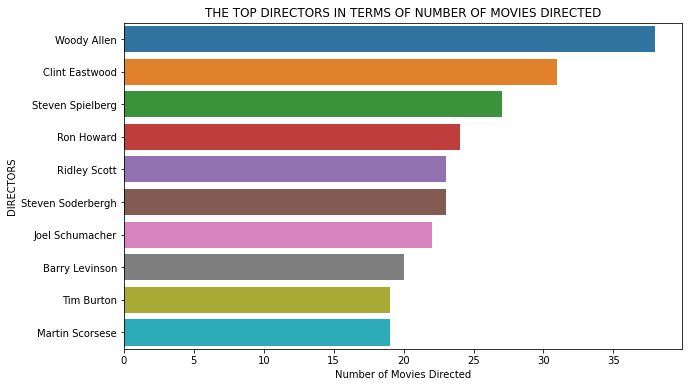

In [533]:
plt.figure(figsize = (10, 6))
sns.barplot(x = top10_dir["Number of Movies Directed"], y = top10_dir["Director"])

plt.title("THE TOP DIRECTORS IN TERMS OF NUMBER OF MOVIES DIRECTED")
plt.rc('font', size=10)
plt.xlabel("Number of Movies Directed")
plt.ylabel("DIRECTORS")
plt.show()

## 20. TOP 15 ACTORS THAT HAVE BEEN THE STAR OF A MOVIE THE MOST IN OVER 40 YEARS.

In [552]:
top15_stars = pd.DataFrame(movies.star.value_counts().head(20)).reset_index()

In [553]:
top15_stars.head()

,index,star
0,Nicolas Cage,43
1,Tom Hanks,41
2,Robert De Niro,41
3,Denzel Washington,37
4,Tom Cruise,34


In [554]:
### Renaming the Columns
top15_stars.rename({"index":"Actor", "star":"Number of Movies"}, axis = 1, inplace = True)

In [555]:
top15_stars

,Actor,Number of Movies
0,Nicolas Cage,43
1,Tom Hanks,41
2,Robert De Niro,41
3,Denzel Washington,37
4,Tom Cruise,34
5,Bruce Willis,34
6,Johnny Depp,33
7,Sylvester Stallone,32
8,John Travolta,31
9,Steve Martin,29


### ABOVE ARE THE TOP 15 ACTORS IN TERMS OF HOW MANY TIMES THEY HAVE BEEN THE STARS OF A MOVIE IN THE LAST 40 YEARS.

### VIZUALIZING THE TOP 15 ACTORS

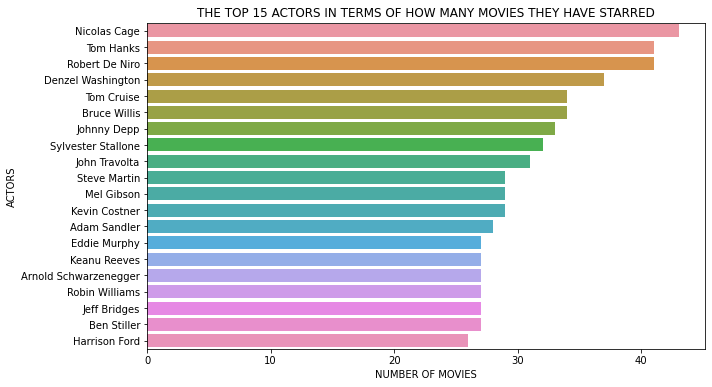

In [557]:
plt.figure(figsize = (10, 6))
sns.barplot(x = top15_stars["Number of Movies"], y = top15_stars["Actor"])
plt.title("THE TOP 15 ACTORS IN TERMS OF HOW MANY MOVIES THEY HAVE STARRED")
plt.xlabel("NUMBER OF MOVIES")
plt.ylabel("ACTORS")
plt.show()